In [29]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [30]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [31]:
X_train.shape

(60000, 28, 28)

In [32]:
X_train,X_test = X_train/255.0,X_test/255.0

In [33]:
#Define the neural network model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dropout(0.5),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')

])


In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [35]:
#compile the model
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [37]:
history = model.fit(
    X_train,y_train,
    epochs= 50,
    validation_data = (X_test,y_test),
    callbacks = [early_stop]
)

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6088 - accuracy: 0.8076 - val_loss: 0.2166 - val_accuracy: 0.9389
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3849 - accuracy: 0.8804 - val_loss: 0.1652 - val_accuracy: 0.9505
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3375 - accuracy: 0.8954 - val_loss: 0.1422 - val_accuracy: 0.9581
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3097 - accuracy: 0.9059 - val_loss: 0.1331 - val_accuracy: 0.9597
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2980 - accuracy: 0.9082 - val_loss: 0.1208 - val_accuracy: 0.9632
Epoch 6/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2865 - accuracy: 0.9109 - val_loss: 0.1189 - val_accuracy: 0.9632
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2818 - accuracy: 0.9119 - val_loss: 0.1165 - val_accuracy:

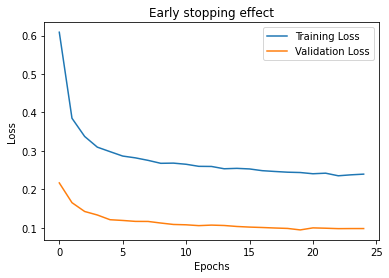

In [38]:
#plot training and validation loss over epochs

plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Early stopping effect')
plt.show()